## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LinearRegression

from scipy.stats import spearmanr

import tensorflow as tf

from copy import deepcopy

2025-04-24 22:28:45.346841: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
np.set_printoptions(suppress=True)

## Data Preparation

In [4]:
# Import the data
data = pd.read_csv("OLDdata/mental_health_analysis.csv")


In [5]:
# Create factorized version
# One-hot encode the categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

In [6]:
# Organize column names
predictors = ['Age', 'Gender', 'Social_Media_Hours', 'Exercise_Hours', 'Screen_Time_Hours', 'Support_System', 'Academic_Performance']
targets = ['Wearable_Stress_Score', 'Survey_Stress_Score']

In [7]:
# Assert that there are no NAs
assert(data.isna().sum().sum() == 0)

## Data Summary Statistics

In [9]:
# Basic summary
summary = data.describe()

# Add MADs
sum_columns = summary.columns
mads = [np.median(np.abs(data[column] - data[column].median())) for column in sum_columns]

summary.loc['mad'] = mads

# Formatting
summary = round(summary, 3)


In [10]:
# Display summary
summary

,User_ID,Age,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score
count,5000.00,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,2500.50,15.493,4.932,1.498,7.057,7.069,3.016,0.497
std,1443.52,1.715,2.854,0.874,1.722,2.883,1.415,0.290
min,1.00,13.000,0.001,0.000,4.002,2.000,1.000,0.000
25%,1250.75,14.000,2.473,0.734,5.612,4.574,2.000,0.245
50%,2500.50,16.000,4.898,1.483,7.069,7.119,3.000,0.500
75%,3750.25,17.000,7.369,2.276,8.519,9.526,4.000,0.750
max,5000.00,18.000,9.995,3.000,9.999,11.999,5.000,1.000
mad,1250.00,1.000,2.443,0.773,1.454,2.484,1.000,0.252


In [17]:
worst_sleep = [None, None, None, None, None]
for i, row in data.iterrows():
    for i, sleeper in enumerate(worst_sleep): 
        if sleeper is None or row.Screen_Time_Hours - row.Sleep_Hours > sleeper.Screen_Time_Hours - sleeper.Sleep_Hours: 
            worst_sleep[i] = row
            break
print(worst_sleep)

[User_ID                        556
Age                             14
Gender                           F
Social_Media_Hours        9.800055
Exercise_Hours            0.434696
Sleep_Hours               4.096218
Screen_Time_Hours        11.980713
Survey_Stress_Score              1
Wearable_Stress_Score     0.284324
Support_System                High
Academic_Performance     Excellent
Name: 555, dtype: object, User_ID                       2596
Age                             16
Gender                           F
Social_Media_Hours        3.332417
Exercise_Hours            0.555495
Sleep_Hours               4.078977
Screen_Time_Hours        11.877058
Survey_Stress_Score              2
Wearable_Stress_Score     0.130505
Support_System                High
Academic_Performance     Excellent
Name: 2595, dtype: object, User_ID                       1530
Age                             17
Gender                           F
Social_Media_Hours        5.320868
Exercise_Hours            2.908049
S

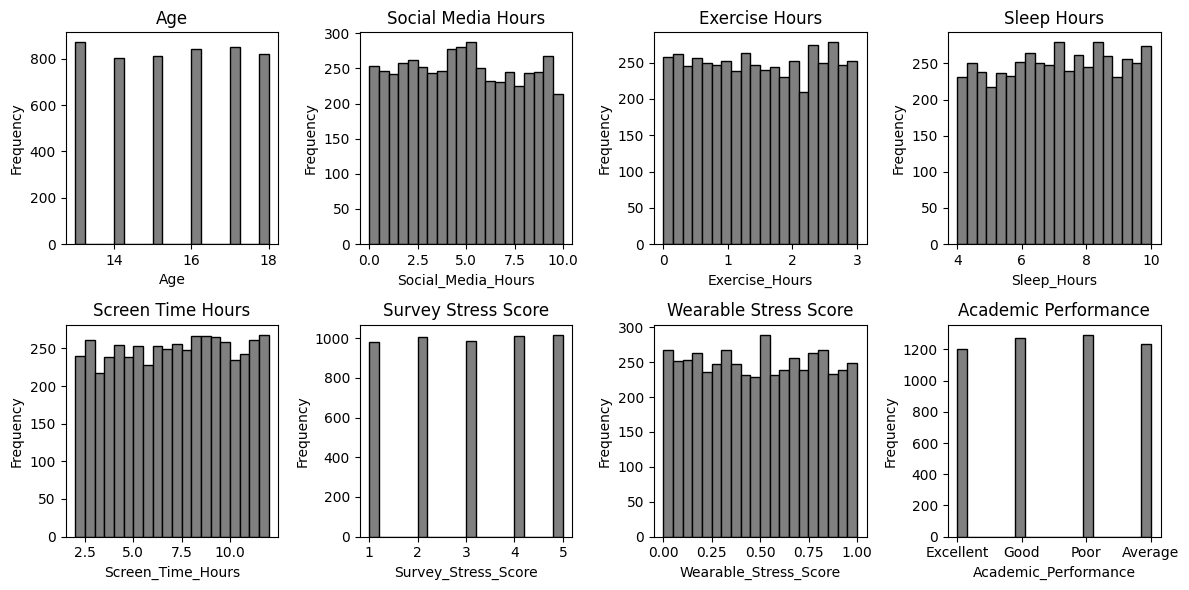

In [8]:
# Set number of columns in the grid
data_to_plot = data[list(filter(lambda x: x not in ["User_ID", "Gender", "Support_System"], data.columns))]
n_cols = 4
n_rows = int(np.ceil(len(data_to_plot.columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
axes = axes.flatten()  # Flatten in case it's 2D

# Plot histograms
for i, col in enumerate(data_to_plot.columns):
    axes[i].hist(data_to_plot[col], bins=20, color='grey', edgecolor='black')
    axes[i].set_title(f'{col.replace("_", " ")}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Factor Analysis

### Factor Analysis Pre-Work

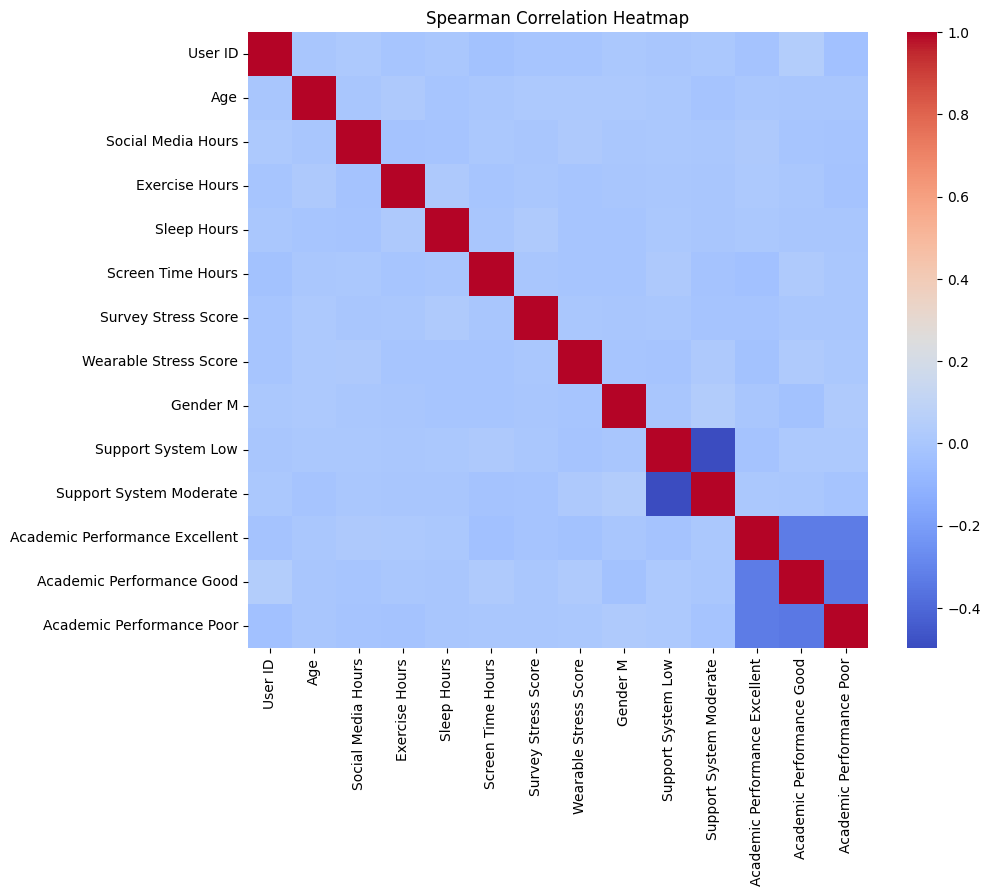

In [10]:
# Compute Spearman correlation matrix
corr, _ = spearmanr(data_scaled)

# Create a heatmap
labels = list(map(lambda x: x.replace("_", " "), data_encoded.columns))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.title('Spearman Correlation Heatmap')
plt.show()

### Factor Analysis Fits

### Factor Analysis Evaluations

## Regression Models

### Regression Model Fits

### Regression Model Evaluations